
#  Lead Scoring Case Study by Gloriya and Bala



### Import Necessary Libraries


In [143]:

import pandas as pd

import numpy as np

import warnings

warnings.filterwarnings('ignore')


In [144]:
# Import visualisation libraries

import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt


In [145]:
# Import all necessary scikit-learn libraries

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score,roc_auc_score,roc_curve,accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score,precision_recall_curve,f1_score

from sklearn import metrics

from sklearn.feature_selection import RFE


In [146]:

# Expand output display to see more rows and columns

pd.set_option('display.max_rows',200)

pd.set_option('display.max_columns',160)



### Inspecting dataset


In [147]:
# Read the dataset

leads_df=pd.read_csv('Leads.csv')


In [148]:
# Check the number of rows and columns

leads_df.shape


(9240, 37)

In [149]:
# View the dataframe 

leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [150]:
# Check the datatype and null value counts of each column

leads_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 


#### Finding : There are null values in a number of columns


In [151]:
# Descriptive statistics of numeric variables

leads_df.describe().transpose()


count           mean           std       min  \
Lead Number                  9240.0  617188.435606  23405.995698  579533.0   
Converted                    9240.0       0.385390      0.486714       0.0   
TotalVisits                  9103.0       3.445238      4.854853       0.0   
Total Time Spent on Website  9240.0     487.698268    548.021466       0.0   
Page Views Per Visit         9103.0       2.362820      2.161418       0.0   
Asymmetrique Activity Score  5022.0      14.306252      1.386694       7.0   
Asymmetrique Profile Score   5022.0      16.344883      1.811395      11.0   

                                  25%       50%        75%       max  
Lead Number                  596484.5  615479.0  637387.25  660737.0  
Converted                         0.0       0.0       1.00       1.0  
TotalVisits                       1.0       3.0       5.00     251.0  
Total Time Spent on Website      12.0     248.0     936.00    2272.0  
Page Views Per Visit              1.0       2.0       3.00      55.0  
Asymmetrique Activity Score      14.0      14.0      15.00      18.0  
Asymmetrique Profile Score       15.0      16.0      18.00      20.0

In [152]:
# List Numeric columns

num_cols=leads_df.select_dtypes(include=np.number).columns

print('Total Numeric columns  :',len(num_cols))
      
num_cols


Total Numeric columns  : 7


Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [153]:
# List Non-numeric columns

cat_cols=leads_df.select_dtypes(exclude=np.number).columns

print('Total Categorical columns  :',len(cat_cols))

cat_cols


Total Categorical columns  : 30


Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [154]:

# Columns with Missing value

sum(leads_df.isnull().sum().values>0)


17


#### Finding : There are 7 numeric columns and 30 categorical columns . Also there are 17 columns with missing values.



### Check for duplicate rows in the dataset


In [155]:

leads_df.duplicated().sum()


0

#### Finding : There are no duplicate rows in the dataset


## Cleaning the dataset


In [156]:
## Checking for columns with unique values. such columns does not add any value to our analysis and we should drop those

sum(leads_df.nunique().values==1)


5


#### Finding :  There are 5 columns which have identical values in all the rows, these columns do not add any value to our analysis, hence we will drop those columns.


In [157]:

unique_cols=leads_df.nunique()

unique_cols


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [158]:
# List of unique value columns

unique_cols=list(unique_cols.index[unique_cols.values==1])

unique_cols


['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [159]:
# Drop unique valued columns

leads_df.drop(unique_cols,1,inplace=True)


In [160]:

leads_df.shape


(9240, 32)


#### Finding : Now we are left with 32 columns


In [161]:
# Converting all the values to lower case to avoid ambiguity

leads_df = leads_df.applymap(lambda x:x.lower() if type(x) == str else x)


In [162]:
# There are a number of columns entries with value as 'Select' which is nothing but null values, replace 'Select' with NaN

leads_df = leads_df.replace('select', np.nan)



### Let's inspect each column in details for a better understanding


In [163]:

for i in leads_df.columns:
    print(i,'----------------------------------------------------------------------------------------------------------')
    print(leads_df[i].value_counts(dropna=False))
    print('-------------------------------------------------------------------------------------------------------------')
    

Prospect ID ----------------------------------------------------------------------------------------------------------
e243fa83-6528-42dc-9cf3-07306ab5a920    1
de60423e-0b72-4cca-8480-080aba0b7b2a    1
89986163-0f5c-4f2b-a003-17311ac2a363    1
b7a48b8c-dcf4-48d8-a301-b575e4431b8c    1
1a2e1831-defc-4574-bbe0-c3d809972ee9    1
                                       ..
02566cad-fc8f-4672-84b1-421c06d2def1    1
06b0873b-e674-4998-a08e-ea548f6ccc30    1
008cfab4-dd2d-4cba-8806-d42ffc6bad40    1
a67b6c51-624e-4e13-899b-bc2ffcf9e430    1
27eff01f-2177-452f-81c9-94b132634e42    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------------------------------------------------------------------------
Lead Number ----------------------------------------------------------------------------------------------------------
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead N


#### Finding : There are a couple of columns with values which does not have enough variability


In [164]:
# Let's go ahead and drop the most redundant columns

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)



## Missing value treatment


In [165]:
# Look for columns which have missing values

sum(leads_df.isnull().mean()>0)


17


### There are 17 out of 30 columns with null values


In [166]:
# Look for the percentage  null values in each column

null_cols=round(leads_df.isnull().mean()*100,2)

null_cols


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [167]:
# We will drop all the columns with Null values Greater than 35%

drop_cols=null_cols[null_cols.values>35].index.to_list()

drop_cols


['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [168]:

leads_df.drop(drop_cols, axis = 1, inplace = True)


In [169]:
# Remaining list of categorical columns

cat_cols=leads_df.select_dtypes(exclude=np.number).columns

cat_cols


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

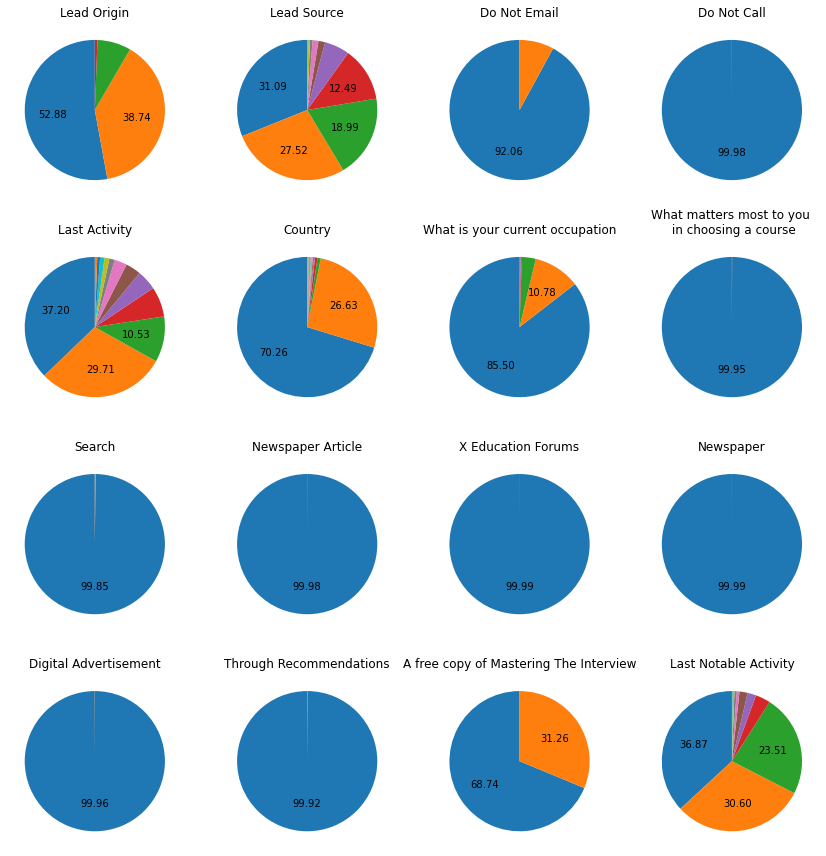

In [170]:
# Lets inspect the variability of all the categorical columns.

# This comes under EDA analysis, however this step is essential here as part of missing value treatment.


def autopct(pct): # only show the label when it is > 10%
    return ('%.2f' % pct) if pct > 10 else ''

fig, ax = plt.subplots(4,4,figsize=(12,12))

ax[0, 0].title.set_text(cat_cols[0])
ax[0, 0].pie(leads_df[cat_cols[0]].value_counts(dropna=False),startangle=90,autopct=autopct) 


ax[0, 1].title.set_text(cat_cols[1])
ax[0, 1].pie(leads_df[cat_cols[1]].value_counts(dropna=False),startangle=90,autopct=autopct) 

ax[0, 2].title.set_text(cat_cols[2])
ax[0, 2].pie(leads_df[cat_cols[2]].value_counts(dropna=False),startangle=90,autopct=autopct) 


ax[0, 3].title.set_text(cat_cols[3])
ax[0, 3].pie(leads_df[cat_cols[3]].value_counts(dropna=False),startangle=90,autopct=autopct) 

ax[1, 0].title.set_text(cat_cols[4])
ax[1, 0].pie(leads_df[cat_cols[4]].value_counts(dropna=False),startangle=90,autopct=autopct) 

ax[1, 1].title.set_text(cat_cols[5])
ax[1, 1].pie(leads_df[cat_cols[5]].value_counts(dropna=False),startangle=90,autopct=autopct) 

ax[1, 2].title.set_text(cat_cols[6])
ax[1, 2].pie(leads_df[cat_cols[6]].value_counts(),startangle=90,autopct=autopct) 

ax[1, 3].title.set_text('What matters most to you \n in choosing a course')
ax[1, 3].pie(leads_df[cat_cols[7]].value_counts(),startangle=90,autopct=autopct) 

ax[2, 0].title.set_text(cat_cols[8])
ax[2, 0].pie(leads_df[cat_cols[8]].value_counts(),startangle=90,autopct=autopct) 

ax[2,1].title.set_text(cat_cols[9])
ax[2,1].pie(leads_df[cat_cols[9]].value_counts(),startangle=90,autopct=autopct) 

ax[2,2].title.set_text(cat_cols[10])
ax[2,2].pie(leads_df[cat_cols[10]].value_counts(),startangle=90,autopct=autopct) 

ax[2,3].title.set_text(cat_cols[11])
ax[2,3].pie(leads_df[cat_cols[11]].value_counts(),startangle=90,autopct=autopct) 

ax[3,0].title.set_text(cat_cols[12])
ax[3,0].pie(leads_df[cat_cols[12]].value_counts(),startangle=90,autopct=autopct) 


ax[3,1].title.set_text(cat_cols[13])
ax[3,1].pie(leads_df[cat_cols[13]].value_counts(),startangle=90,autopct=autopct) 


ax[3,2].title.set_text(cat_cols[14])
ax[3,2].pie(leads_df[cat_cols[14]].value_counts(),startangle=90,autopct=autopct) 

ax[3,3].title.set_text(cat_cols[15])
ax[3,3].pie(leads_df[cat_cols[15]].value_counts(),startangle=90,autopct=autopct) 

fig.tight_layout()

fig.show()

In [171]:
# As per the above pie charts, we will remove columns which do not have much variability , keeping a cut off at 95%

drop_cols = ['Do Not Call','Country','Search','Newspaper Article','What matters most to you in choosing a course','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

leads_df.drop(drop_cols, axis = 1, inplace = True)


In [172]:

null_cols=round(leads_df.isnull().mean()*100,2)

null_cols


Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64



### Now there are 5 more columns with null values, we will go ahead and impute those with the most appropriate values


In [173]:
#Let's inspect the variable 'Lead Source'

round(leads_df['Lead Source'].value_counts(dropna=False)/leads_df['Lead Source'].value_counts().sum()*100,1)


google               31.2
direct traffic       27.6
olark chat           19.1
organic search       12.5
reference             5.8
welingak website      1.5
referral sites        1.4
facebook              0.6
NaN                   0.4
bing                  0.1
click2call            0.0
live chat             0.0
press_release         0.0
social media          0.0
welearnblog_home      0.0
blog                  0.0
youtubechannel        0.0
nc_edm                0.0
testone               0.0
welearn               0.0
pay per click ads     0.0
Name: Lead Source, dtype: float64


#### 31% of the categorical variable 'Lead Source' are  'Google ' hence we will go ahead and impute the missing values with this value             

In [174]:

leads_df['Lead Source']=leads_df['Lead Source'].fillna(leads_df['Lead Source'].mode()[0])


In [175]:
# Let's examine 'TotalVisits'

leads_df.TotalVisits.isnull().sum()                                     


137

In [176]:

leads_df.TotalVisits.describe()


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

### There seems to be an outlier issue

In [177]:

fig = px.box(leads_df.TotalVisits,width=400, height=300,color_discrete_sequence=['seagreen'])

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="Aquamarine")

fig.show()


In [178]:
# We will not cap all the outliers since it will remove a significant number of rows from our datset

# Instead we will cap 'TotalVisits' greater than 100

leads_df=leads_df[leads_df['TotalVisits']<100]


In [179]:
# Recheck the box plot

fig = px.box(leads_df.TotalVisits,width=400, height=300,color_discrete_sequence=['seagreen'])

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="Aquamarine")

fig.show()



#### Findings : There are still a few outliers, but the upper range has come down to an acceptable range


In [180]:
# We will also inspect the target variable

leads_df.Converted.value_counts()


0    5640
1    3460
Name: Converted, dtype: int64

In [181]:
# Traget Inbalance

leads_df.Converted.value_counts()[1]/leads_df.Converted.value_counts().sum()


0.3802197802197802


#### We can see there is also inbalance in the target variable 'Converted'


In [182]:
#Recheck the missing values

null_cols=leads_df.isnull().sum()

null_cols[null_cols.values>0]


What is your current occupation    2682
dtype: int64

In [183]:
# We need impute the missing values of the variable 'What is your current occupation' since occupation of an individual is significant information


leads_df['What is your current occupation'].value_counts(dropna=False)


unemployed              5500
NaN                     2682
working professional     679
student                  207
other                     15
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

In [184]:
# Imputing with mode is  not the right choice here since the missing count is quite high

# Rather convert NaN values as 'not provided', instead of dropping the column or imputing with mode

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('not provided')


In [185]:

leads_df.isnull().sum()


Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [186]:

print(len(leads_df.index))

print(round(len(leads_df.index)/9240*100,1))


9100
98.5



#### All the missing values has been treated. We are able to maintain 98.5 % rows of the original dataset



## Exploratory Data Analysis



### Univariate analysis for Numeric Variables


In [187]:

# Filter out numeric column for EDA

num_cols=leads_df.select_dtypes(include=np.number).columns

num_cols= num_cols.drop('Converted') # Target variable not needed

num_cols


Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [188]:

# Lets analyze numeric variables visually using plotly

for y in list(num_cols):
    
    fig = px.box(leads_df[y],width=400, height=300,color_discrete_sequence=['seagreen'])
       
    fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="aquamarine")    
    
    fig.show()   
    
    print('\n')
    
for y in list(num_cols):
    
    fig = px.histogram(leads_df, x=y,color_discrete_sequence=['seagreen'], width=900, height=500)
    
    fig.show()
    



#### Finding : There seems to be outliers for the column ''Page Views Per Visit''

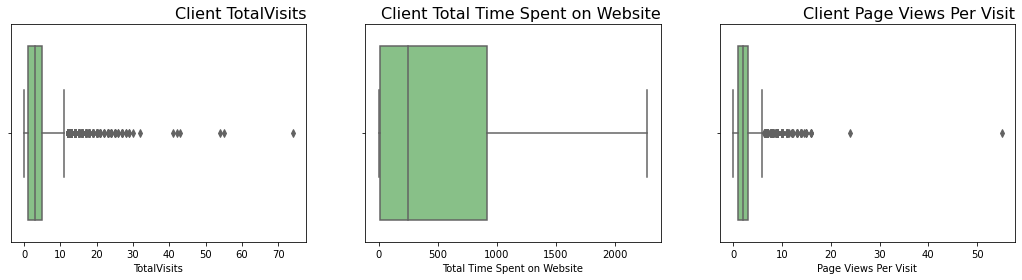

In [189]:
plt.figure(figsize=[18,4])
    
plt.subplot(1,3,1)
        
sns.boxplot(data=leads_df,x=uni_numeric[0],palette="Accent",orient='v')
    
plt.title('Client '+uni_numeric[0],fontsize=16,loc='right')
plt.subplot(1,3,2)
        
sns.boxplot(data=leads_df,x=uni_numeric[1],palette="Accent",orient='v')
    
plt.title('Client '+uni_numeric[1],fontsize=16,loc='right')
plt.subplot(1,3,3)
        
sns.boxplot(data=leads_df,x=uni_numeric[2],palette="Accent",orient='h')
    
plt.title('Client '+uni_numeric[2],fontsize=16,loc='right')

plt.show()


In [49]:

leads_df['Page Views Per Visit'].describe()


count    9100.000000
mean        2.361797
std         2.160404
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [50]:
# We will treat the outliers by capping 'Page Views Per Visit' greater than 15

leads_df=leads_df[leads_df['Page Views Per Visit']<15]


In [51]:

plt.figure(figsize = (10,5))    
    
fig = px.box(y='Page Views Per Visit',data_frame=leads_df, width=400, height=300,color_discrete_sequence=['seagreen'])
    
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="aquamarine")    
    
fig.show()   



<Figure size 720x360 with 0 Axes>


## Uni variate Analysis - Categorical Variable


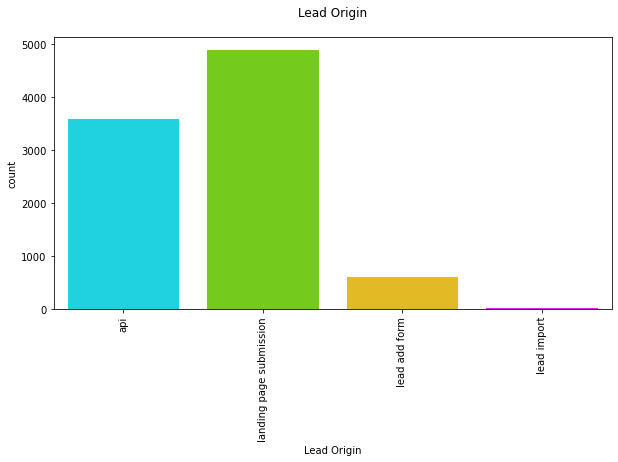

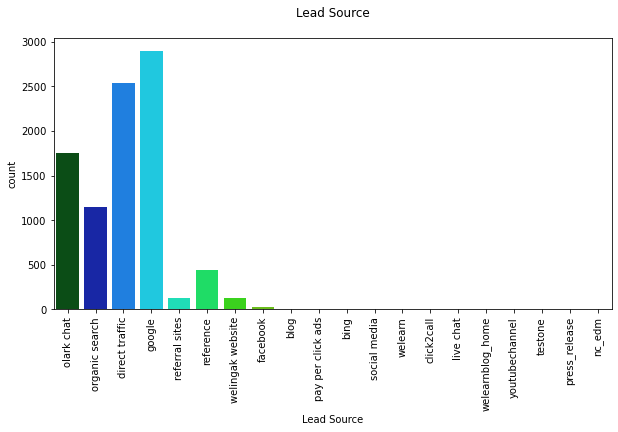

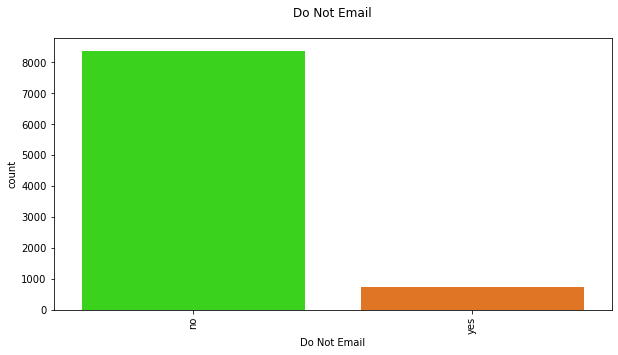

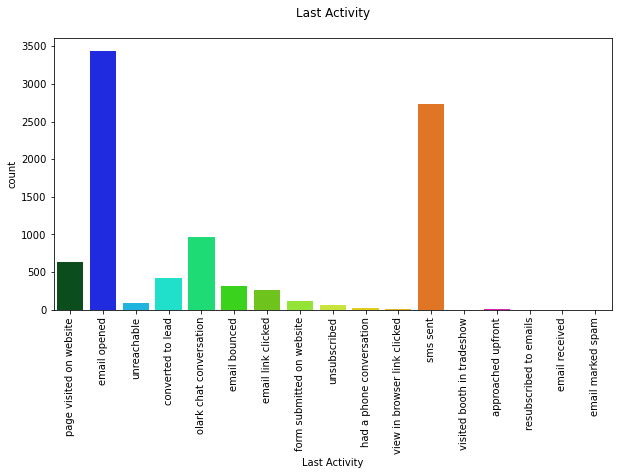

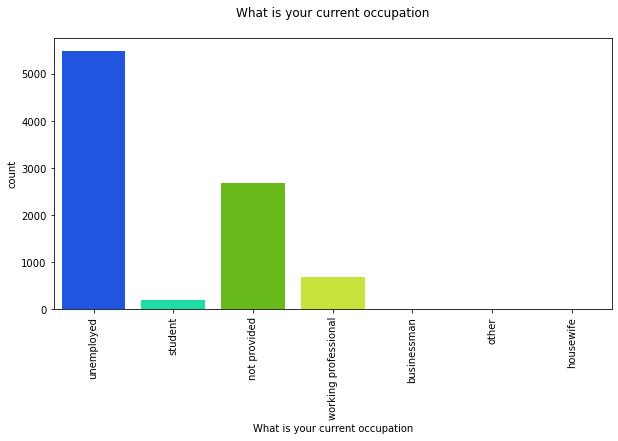

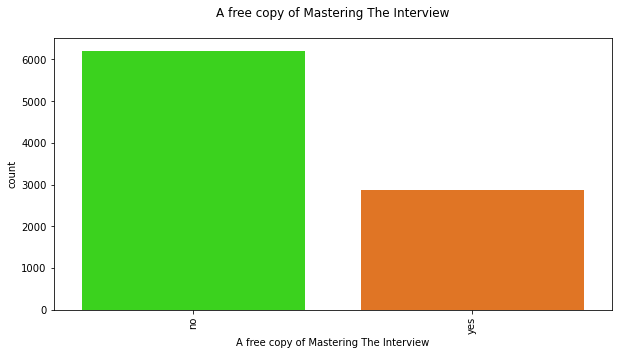

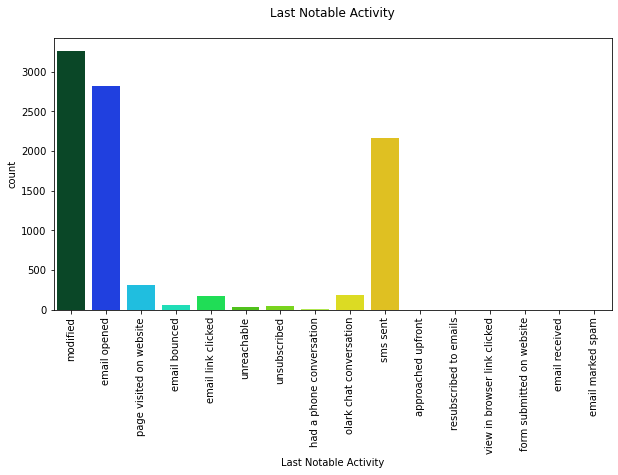

In [52]:

# Filter out categorical  column for EDA

cat_cols=leads_df.select_dtypes(exclude=np.number).columns

for col in cat_cols:
    
    plt.figure(figsize = (10,5))
    sns.countplot(x=col,data= leads_df,palette='gist_ncar').tick_params(axis='x', rotation = 90)
    plt.title(col+'\n')
    plt.show()
    print('\n\n')


#### Finding : 'Last Notable Activity' and 'Last Activity' exhibits similar pattern of values.

#### we will further analyze it in detail with heatmap analysis to find out any possible correlations and will take necessary actions.



### Trying the same plot with Plotly only for learning purpose

cat_cols=leads_df.select_dtypes(exclude=np.number).columns

for col in cat_cols:
    
    fig = px.bar(leads_df[col].value_counts(),height=500,width=700,color=leads_df[col].value_counts(),color_continuous_scale='armyrose',title=col)
    
    fig.show()


## Bivariate Analysis Categorical Variable w.r.t Target


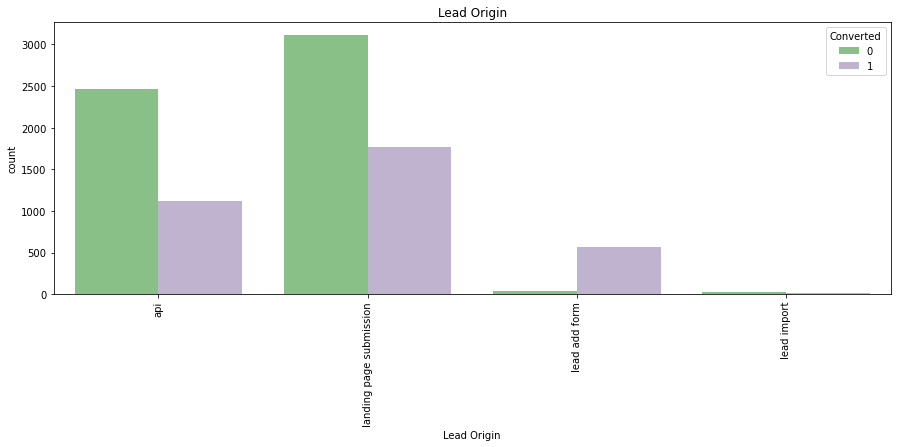

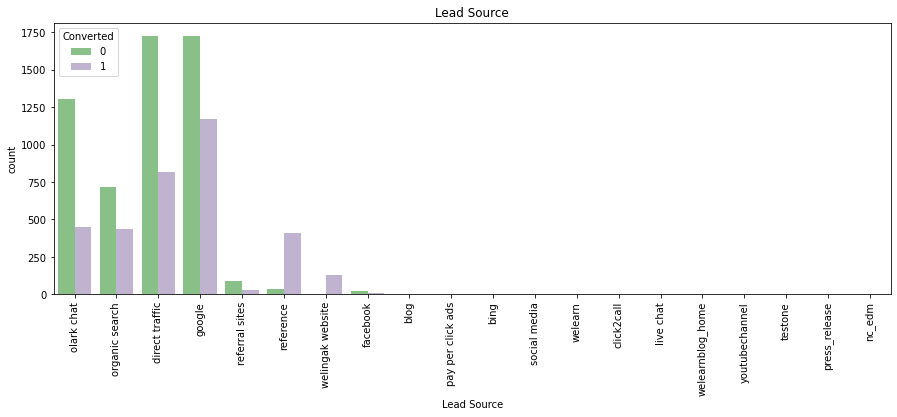

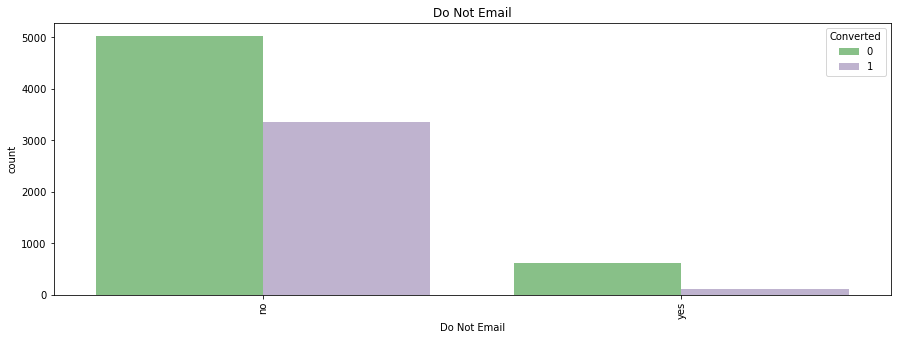

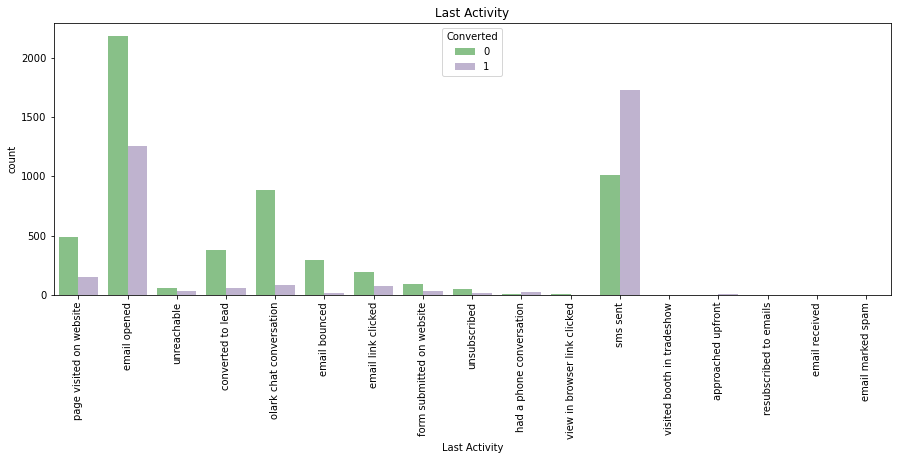

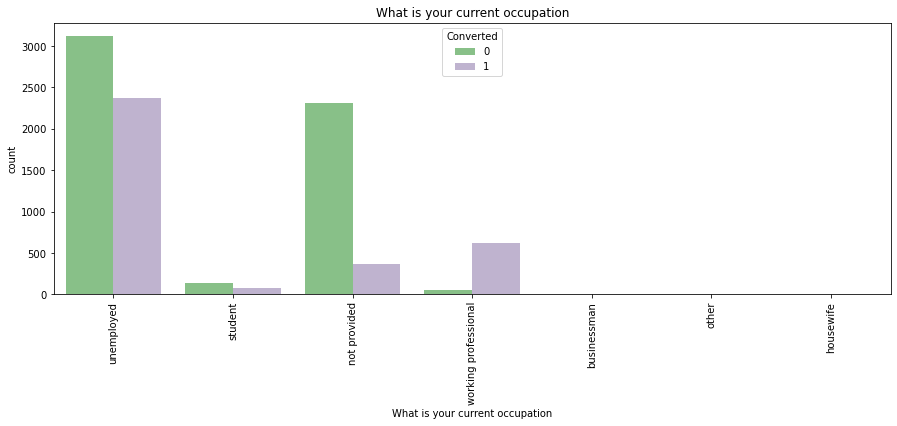

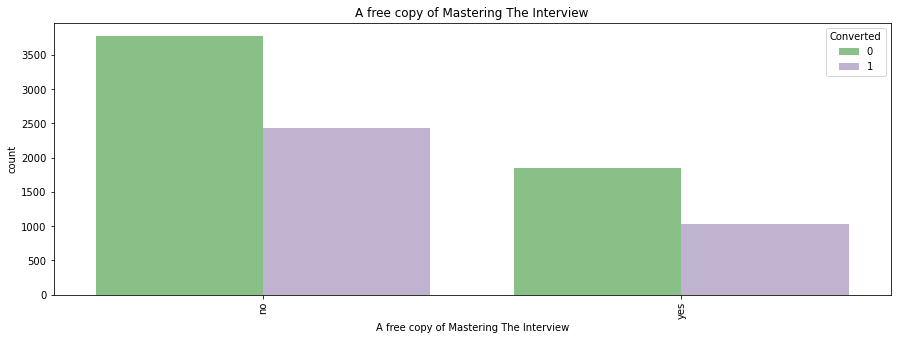

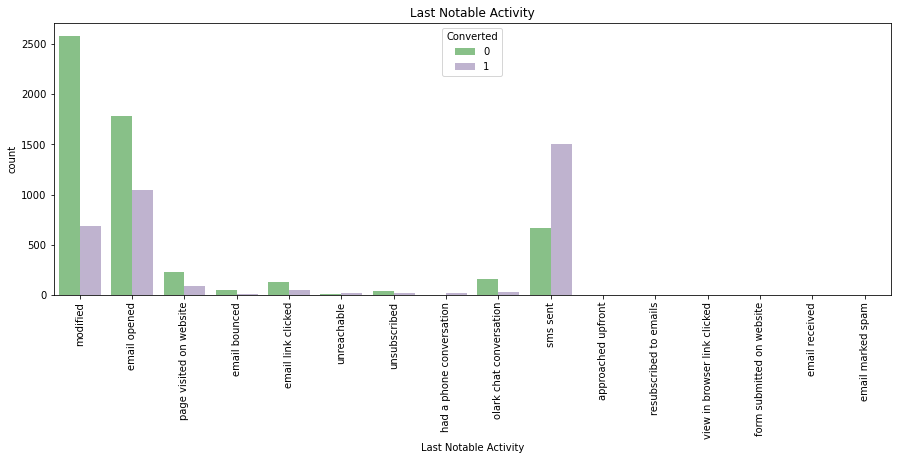

In [53]:

for col in cat_cols:
    
    plt.figure(figsize = (15,5))
    sns.countplot(x=col, hue='Converted', data= leads_df,palette='Accent').tick_params(axis='x', rotation = 90)
    plt.title(col)
    plt.show()
    print('\n\n')


#### Finding : As per the bivariate analysis as well, 'Last Notable Activity' and 'Last Activity' exhibits similar pattern of distribution with the target variable.



## Multivariate Analysis


In [54]:
# Check the correlation among numeric variables

leads_df.corr()


Converted  TotalVisits  \
Converted                     1.000000     0.039073   
TotalVisits                   0.039073     1.000000   
Total Time Spent on Website   0.354986     0.302879   
Page Views Per Visit          0.000156     0.651750   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.354986              0.000156  
TotalVisits                                     0.302879              0.651750  
Total Time Spent on Website                     1.000000              0.335780  
Page Views Per Visit                            0.335780              1.000000

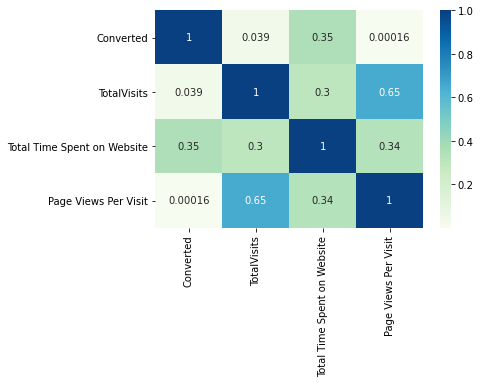

In [55]:
# Heatmap for numeric variables 

sns.heatmap(leads_df.corr(),annot=True, cmap='GnBu')

plt.show()

#### Findings:

1. 'TotalVisits' and 'Page Views Per Visit' have a correlation of .65, indicates possible multucollineariy, hence we will drop one of the variable

2. 'Total Time Spent on Website' and target variable 'Converted' have a correlation of 0.35, indicates that 'Total Time Spent on Website' could a possible predictor of successful leads.

3. 'Total Time Spent on Website' and 'Page Views Per Visit' have a correlation coeffcient of .34

#### We can further analyse these variables with VIF treatment as part of model building.


In [56]:

# Dropping 'Page Views Per Visit' since this variable is least correlated with the target.

leads_df.drop('Page Views Per Visit',1,inplace=True)



### Trying the same scatter plot with Plotly only for learning purpose

fig = px.imshow(leads_df.corr(),width=800, height=500,title ='Correlation Heatmap',color_continuous_scale='armyrose')

#fig.update_layout(margin=dict(l=50, r=20, t=20, b=20),paper_bgcolor="Aquamarine")

fig.show()


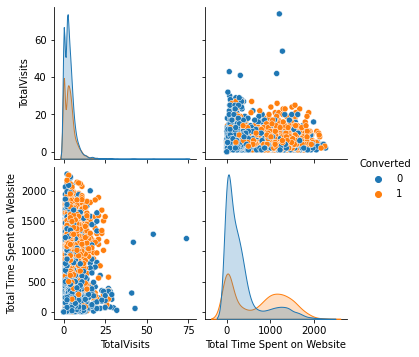

In [57]:

# Let's analyze the pairplot for numeric variables

sns.pairplot(leads_df,diag_kind='kde',hue='Converted')

plt.show()



#### Findings : 

1. Only the variables 'TotalVisits' and 'Page Views Per Visit' shows a positive correlation as per the scatter plot.

2. Also it shows that even though the page views are compararively less but if the person visit the website frequently, that indicates a hot lead.

3. If a lead spends more time on the web site it is an indication of a possible lead.

4. More time spend on the website as well more pages viewed per visit is a good indication of successful conversion.


In [58]:
# Craete a dataframe of only numeric variables

num_df=leads_df.select_dtypes(include=np.number)


# Trying the same scatter plot with Plotly only for learning purpose

fig = px.scatter_matrix(data_frame=num_df,color_continuous_scale='armyrose',color ='Converted')

fig.show()


In [59]:
# Once again check null values and confirm

leads_df.isnull().sum()


Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


## Dummy Variable Creation


In [60]:

leads_df.head()


Lead Origin     Lead Source Do Not Email  Converted  \
0                      api      olark chat           no          0   
1                      api  organic search           no          0   
2  landing page submission  direct traffic           no          1   
3  landing page submission  direct traffic           no          0   
4  landing page submission          google           no          1   

   TotalVisits  Total Time Spent on Website            Last Activity  \
0          0.0                            0  page visited on website   
1          5.0                          674             email opened   
2          2.0                         1532             email opened   
3          1.0                          305              unreachable   
4          2.0                         1428        converted to lead   

  What is your current occupation A free copy of Mastering The Interview  \
0                      unemployed                                     no   
1                      unemployed                                     no   
2                         student                                    yes   
3                      unemployed                                     no   
4                      unemployed                                     no   

  Last Notable Activity  
0              modified  
1          email opened  
2          email opened  
3              modified  
4              modified

In [61]:

#There is just one variable with Yes/No values

# Convert Yes or No values to 1 and 0 respectively


leads_df['A free copy of Mastering The Interview']=leads_df['A free copy of Mastering The Interview'].replace(['yes','no'],[1,0])


In [62]:
# Filter out remaining categorical columns

cat_cols=list(leads_df.select_dtypes(exclude=np.number).columns)

cat_cols


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [63]:
# Create dummies for the categorical variables

dummies=pd.get_dummies(leads_df[cat_cols],drop_first = True) 

leads_df=pd.concat([leads_df,dummies],axis=1)

leads_df.drop(cat_cols,axis=1,inplace=True)


###  Create the correlation heatmap


In [64]:

# Now all the variables are being converted to numeric

leads_df.head()

Converted  TotalVisits  Total Time Spent on Website  \
0          0          0.0                            0   
1          0          5.0                          674   
2          1          2.0                         1532   
3          0          1.0                          305   
4          1          2.0                         1428   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Source_blog  Lead Source_click2call  \
0                        0                 0                       0   
1                        0                 0                       0   
2                        0                 0                       0   
3                        0                 0                       0   
4                        0                 0                       0   

   Lead Source_direct traffic  Lead Source_facebook  Lead Source_google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_live chat  Lead Source_nc_edm  Lead Source_olark chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_organic search  Lead Source_pay per click ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_press_release  Lead Source_reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_referral sites  Lead Source_social media  Lead Source_testone  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_welearn  Lead Source_welearnblog_home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  \
0                             0     

<AxesSubplot:>

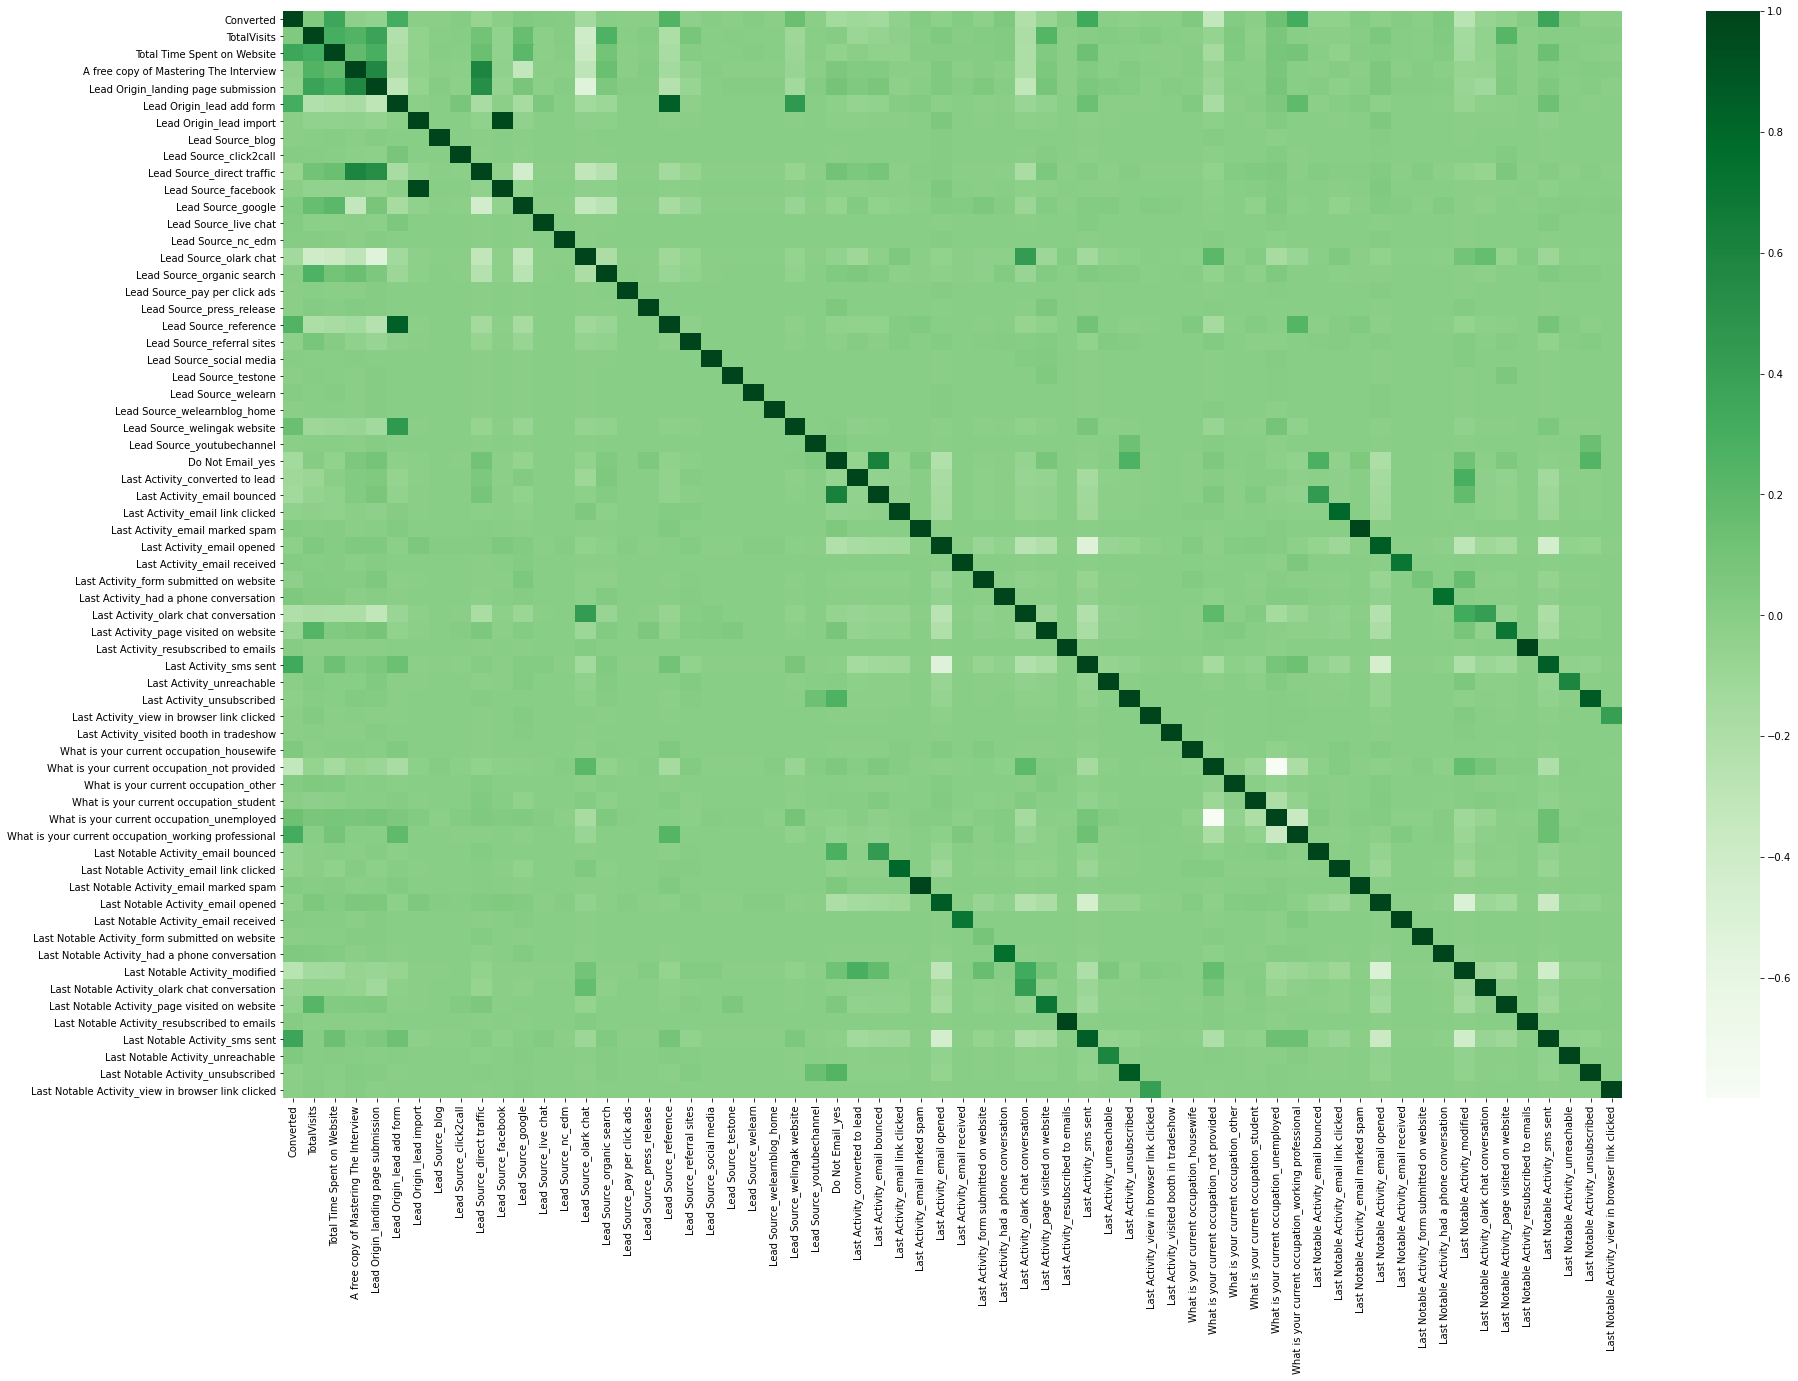

In [65]:

plt.figure(figsize=(30,20))

sns.heatmap(leads_df.corr(),cmap='Greens')


# As per the heatmap, variables which are higly correlated with Target are:

1. 'Last Notable Activity_sms sent'


2. 'Last Notable Activity_modified'


3. 'What is your current occupation_working professional'


4.  'What is your current occupation_not provided'


5.  'Last Activity_sms sent'


6.  Last Activity_olark chat conversation'


7. 'Last Activity_page visited on website'


8. Total Time Spent on Website'


9. 'Lead Origin_lead add form'


10. 'Lead Source_olark chat'


11. 'Lead Source_direct traffic'

       
12. 'Lead Source_reference'


13. 'Last Activity_converted to lead'

 

## The below variables are higly correlated to each other and hence we will go ahead and drop one of the variable



1. 'What is your current occupation_not provided' Vs 'What is your current occupation_unemployed'


2. 'Last Activity_email opened' Vs 'Last Activity_sms sent' 


3. 'Lead Source_reference' Vs 'Lead Origin_lead add form'


4. 'Lead Source_facebook' Vs 'Lead Origin_lead import'


5.   'Last Notable Activity_olark chat conversation' Vs 'Last Activity_olark chat conversation'


6.  'Last Activity_sms sent' Vs 'Last Notable Activity_sms sent'


7.	'Last Notable Activity_had a phone conversation' Vs 'Last Activity_had a phone conversation'


8.	'Last Activity_unreachable' Vs 'Last Notable Activity_unreachable'




In [66]:
# Drop the most correlated dummy variables

leads_df.drop(['What is your current occupation_unemployed','Last Activity_email opened','Lead Source_reference','Lead Source_facebook','Last Notable Activity_olark chat conversation','Last Activity_sms sent','Last Notable Activity_had a phone conversation','Last Activity_unreachable'],1,inplace=True)


<AxesSubplot:>

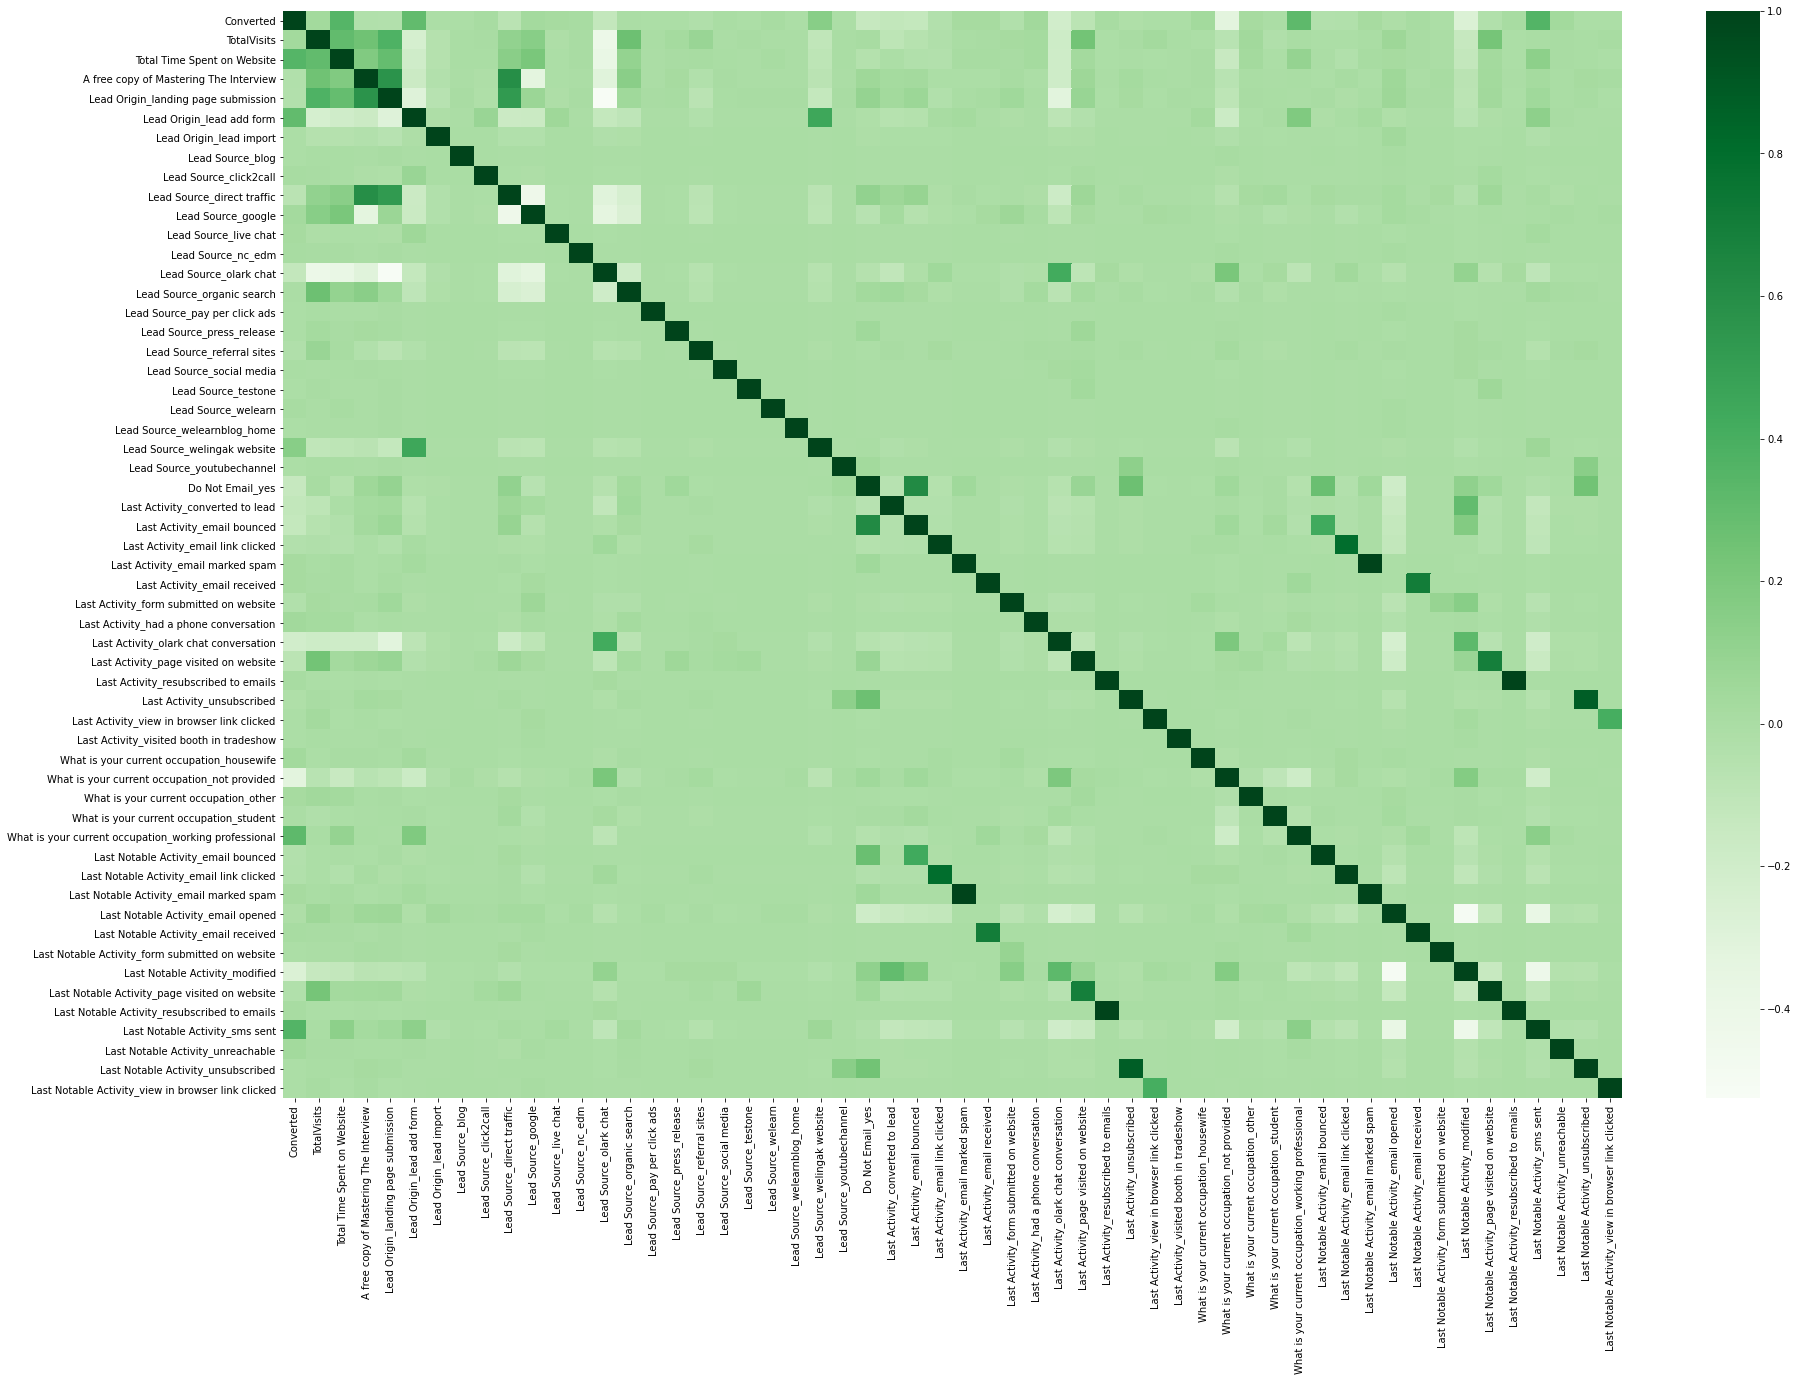

In [67]:
# Recheck the heatmap

plt.figure(figsize=(30,20))

sns.heatmap(leads_df.corr(),cmap='Greens')



# Trying the same scatter plot with Plotly only for learning purpose

fig = px.imshow(leads_df.corr(),width=1000, height=1000,title ='Correlation Heatmap',color_continuous_scale='armyrose')

fig.update_layout(margin=dict(l=50, r=20, t=20, b=20),paper_bgcolor="gainsboro")

fig.show()


In [68]:
# Split Predictors and target variables for model building

y=leads_df[['Converted']]

X=leads_df.drop('Converted',1)


In [69]:

X.shape


(9091, 55)

### Test Train Split

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [71]:

X_train.shape


(6363, 55)

In [72]:

X_test.shape


(2728, 55)

In [73]:
# Instantiate the MinMaxScaler to scale numeric variables

scaler=MinMaxScaler()


In [74]:
# 'Page Views Per Visit' was dropped in an earlier step, hence will drop the same from our list of numeric variables

num_cols=num_cols.drop('Page Views Per Visit')


In [75]:
# Scale the training dataset

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])


In [76]:

X_train.head()


TotalVisits  Total Time Spent on Website  \
5334     0.054054                     0.636444   
9060     0.027027                     0.106074   
310      0.094595                     0.091109   
4585     0.067568                     0.371919   
1052     0.040541                     0.638644   

      A free copy of Mastering The Interview  \
5334                                       1   
9060                                       1   
310                                        0   
4585                                       1   
1052                                       0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
5334                                    1                          0   
9060                                    1                          0   
310                                     0                          0   
4585                                    1                          0   
1052                                    1                          0   

      Lead Origin_lead import  Lead Source_blog  Lead Source_click2call  \
5334                        0                 0                       0   
9060                        0                 0                       0   
310                         0                 0                       0   
4585                        0                 0                       0   
1052                        0                 0                       0   

      Lead Source_direct traffic  Lead Source_google  Lead Source_live chat  \
5334                           1                   0                      0   
9060                           1                   0                      0   
310                            0                   1                      0   
4585                           1                   0                      0   
1052                           0                   1                      0   

      Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
5334                   0                       0                           0   
9060                   0                       0                           0   
310                    0                       0                           0   
4585                   0                       0                           0   
1052                   0                       0                           0   

      Lead Source_pay per click ads  Lead Source_press_release  \
5334                              0                          0   
9060                              0                          0   
310                               0                          0   
4585                              0                          0   
1052                              0                          0   

      Lead Source_referral sites  Lead Source_social media  \
5334                           0                         0   
9060                           0                         0   
310                            0                         0   
4585                           0                         0   
1052                           0                         0   

      Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  \
5334                    0                    0                             0   
9060                    0                    0                             0   
310                     0                    0                             0   
4585                    0                    0                             0   
1052                    0                    0                             0   

      Lead Source_welingak website  Lead Source_youtubechannel  \
5334                             0                           0   
9060                             0                           0   
310                              0                           0   
4585                             0                           

In [77]:
#Import statsmodel library

import statsmodels.api as sm



###  Model Building and Evaluation


In [78]:

# Logistic regression model - GLM(Generalized Linear Model)

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

res=logm1.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.3
Date:                Wed, 14 Jul 2021   Deviance:                       4988.6
Time:                        15:30:06   Pearson chi2:                 6.19e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2386      0.820     -2.730      0.006      -3.846      -0.631
TotalVisits                                              2.7323      0.875      3.122      0.002       1.017       4.448
Total Time Spent on Website                              4.6354      0.173     26.805      0.000       4.296       4.974
A free copy of Mastering The Interview                   0.0754      0.109      0.690      0.490      -0.139       0.290
Lead Origin_landing page submission                     -0.2249      0.107     -2.094      0.036      -0.435      -0.014
Lead Origin_lead add form                                4.0584      0.715      5.675      0.000       2.657       5.460
Lead Origin_lead import                                  1.3424      0.834      1.610      0.107      -0.292       2.977
Lead Source_blog                                      5.032e-09   1.88e-05      0.000      1.000   -3.68e-05    3.68e-05
Lead Source_click2call                                  -1.3979      1.302     -1.074      0.283      -3.950       1.154
Lead Source_direct traffic                               0.1663      0.717      0.232      0.817      -1.240       1.572
Lead Source_google                                       0.5801      0.710      0.817      0.414      -0.812       1.972
Lead Source_live chat                                   20.5806   8.18e+04      0.000      1.000    -1.6e+05     1.6e+05
Lead Source_nc_edm                                      25.6969    9.8e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_olark chat                                   1.7831      0.721      2.473      0.013       0.370       3.196
Lead Source_organic search                               0.4124      0.719      0.573      0.566      -0.997       1.822
Lead Source_pay per click ads                          -21.7046   9.46e+04     -0.000      1.000   -1.85e+05    1.85e+05
Lead Source_press_release                              -19.7222   7.69e+04     -0.000      1.000   -1.51e+05    1.51e+05
Lead Source_referral sites                               0.5054      0.784      0.645      0.519      -1.031       2.041
Lead Source_social media                                25.7838   8.28e+04      0.000      1.000   -1.62e+05    1.62e+05
Lead Source_testone                                    -21.3337   7.81e+04     -0.000      1.000   -1.53e+05    1.53e+05
Lead Source_welearn                                     23.5875   7.69e+04      0.000      1.000   -1.51e+05    1.51e+05
Lead Source_welearnblog_home                          2.073e-10   5.64e-06   3.68e-05      1.000    -1.1e-05     1.1e-05
Lead Source_welingak website                             2

In [79]:
# Apply Recursive Feature Elimination for initial screening of variables


logreg = LogisticRegression() # Create a Logistic regression class object as an input for RFE

logreg.fit(X_train,y_train) # Fit the model with the training data

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)


In [80]:
# Create a datframe to view the RFE output with the selected variables and their respective ranking

rfe_leads_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})

rfe_leads_df.sort_values(by='Ranking')


Predictor  Select Status  Ranking
0                                         TotalVisits           True        1
31              Last Activity_olark chat conversation           True        1
30             Last Activity_had a phone conversation           True        1
41  What is your current occupation_working profes...           True        1
25                        Last Activity_email bounced           True        1
24                    Last Activity_converted to lead           True        1
23                                   Do Not Email_yes           True        1
21                       Lead Source_welingak website           True        1
38       What is your current occupation_not provided           True        1
12                             Lead Source_olark chat           True        1
37          What is your current occupation_housewife           True        1
1                         Total Time Spent on Website           True        1
51                     Last Notable Activity_sms sent           True        1
4                           Lead Origin_lead add form           True        1
52                  Last Notable Activity_unreachable           True        1
29            Last Activity_form submitted on website          False        2
33               Last Activity_resubscribed to emails          False        3
17                           Lead Source_social media          False        4
32              Last Activity_page visited on website          False        5
11                                 Lead Source_nc_edm          False        6
50       Last Notable Activity_resubscribed to emails          False        7
8                          Lead Source_direct traffic          False        8
13                         Lead Source_organic search          False        9
9                                  Lead Source_google          False       10
16                         Lead Source_referral sites          False       11
39              What is your current occupation_other          False       12
7                              Lead Source_click2call          False       13
43           Last Notable Activity_email link clicked          False       14
48                     Last Notable Activity_modified          False       15
45                 Last Notable Activity_email opened          False       16
26                   Last Activity_email link clicked          False       17
35         Last Activity_view in browser link clicked          False       18
5                             Lead Origin_lead import          False       19
40            What is your current occupation_student          False       20
44            Last Notable Activity_email marked spam          False       21
14                      Lead Source_pay per click ads          False       22
18                                Lead Source_testone          False       23
19                                Lead Source_welearn          False       24
27                    Last Activity_email marked spam          False       25
54  Last Notable Activity_view in browser link cli...          False       26
3                 Lead Origin_landing page submission          False       27
53                 Last Notable Activity_unsubscribed          False       28
42                Last Notable Activity_email bounced          False       29
49      Last Notable Activity_page visited on website          False       30
46               Last Notable Activity_email received          False       31
2              A free copy of Mastering The Interview          False       32
28                       Last Activity_email received          False       33
15                          Lead Source_press_release          False       34
10                              Lead Source_live chat          False       35
47    Last Notable Activity_form submitted on website          False       36
34                         Last Activity_unsubscribed          Fal

In [81]:
# List of variables selected by RFE

rfe_cols = X_train.columns[rfe.support_]

rfe_cols


Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_converted to lead', 'Last Activity_email bounced',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable'],
      dtype='object')

In [82]:
# Apply GLM model to the selected features

X_train_sm = sm.add_constant(X_train[rfe_cols])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res=logm2.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.4
Date:                Wed, 14 Jul 2021   Deviance:                       5082.7
Time:                        15:30:11   Pearson chi2:                 6.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1516      0.090    -23.813      0.000      -2.329      -1.975
TotalVisits                                              2.0336      0.794      2.562      0.010       0.478       3.589
Total Time Spent on Website                              4.6198      0.169     27.273      0.000       4.288       4.952
Lead Origin_lead add form                                3.7885      0.228     16.596      0.000       3.341       4.236
Lead Source_olark chat                                   1.4859      0.116     12.802      0.000       1.258       1.713
Lead Source_welingak website                             2.6114      1.037      2.519      0.012       0.579       4.643
Do Not Email_yes                                        -1.2253      0.188     -6.519      0.000      -1.594      -0.857
Last Activity_converted to lead                         -1.0186      0.206     -4.937      0.000      -1.423      -0.614
Last Activity_email bounced                             -0.9402      0.403     -2.335      0.020      -1.729      -0.151
Last Activity_had a phone conversation                   3.0460      0.858      3.549      0.000       1.364       4.728
Last Activity_olark chat conversation                   -1.5155      0.170     -8.917      0.000      -1.849      -1.182
What is your current occupation_housewife               22.7616   1.66e+04      0.001      0.999   -3.26e+04    3.26e+04
What is your current occupation_not provided            -1.2867      0.090    -14.279      0.000      -1.463      -1.110
What is your current occupation_working professional     2.4333      0.189     12.865      0.000       2.063       2.804
Last Notable Activity_sms sent                           1.4334      0.082     17.566      0.000       1.274       1.593
Last Notable Activity_unreachable                        1.4936      0.535      2.793      0.005       0.445       2.542
========================================================================================================================
"""

In [83]:
# Function to calculate VIF for multicollinearity among variables

def fetch_vif_df(local_df):
    
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = local_df.columns
    
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    
    vif_df = vif_df.reset_index(drop=True)
    
    return vif_df


In [84]:

# VIF for Feature elimination

fetch_vif_df(X_train[rfe_cols])


Features   VIF
0                         Total Time Spent on Website  1.85
1                                    Do Not Email_yes  1.78
2                                         TotalVisits  1.77
3                         Last Activity_email bounced  1.71
4                              Lead Source_olark chat  1.57
5                           Lead Origin_lead add form  1.45
6        What is your current occupation_not provided  1.45
7               Last Activity_olark chat conversation  1.44
8                      Last Notable Activity_sms sent  1.39
9                        Lead Source_welingak website  1.30
10  What is your current occupation_working profes...  1.19
11                    Last Activity_converted to lead  1.04
12             Last Activity_had a phone conversation  1.01
13          What is your current occupation_housewife  1.01
14                  Last Notable Activity_unreachable  1.01

In [85]:
# Predict the target variable for the training data

y_train_pred = res.predict(sm.add_constant(X_train[rfe_cols]))


In [86]:
# Creating a dataframe with the actual Conversion and the predicted probabilities

y_train_pred_df = pd.DataFrame({'Original_Conver':y_train.Converted, 'Conver_Prob':y_train_pred,'ID': y_train.index})

y_train_pred_df.head()


Original_Conver  Conver_Prob    ID
5334                1     0.710648  5334
9060                0     0.456808  9060
310                 0     0.055985   310
4585                1     0.426525  4585
1052                1     0.707075  1052

In [87]:
# Create a new column for the predictions

y_train_pred_df['predicted'] = y_train_pred_df.Conver_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()


Original_Conver  Conver_Prob    ID  predicted
5334                1     0.710648  5334          1
9060                0     0.456808  9060          0
310                 0     0.055985   310          0
4585                1     0.426525  4585          0
1052                1     0.707075  1052          1

In [88]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.predicted )

print(confusion)


[[3476  454]
 [ 720 1713]]


In [89]:
# Let's check the model accuracy

print("Accuracy of the model is :  ",round(metrics.accuracy_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted),2)*100, '%')


Accuracy of the model is :   82.0 %


In [90]:
# 'What is your current occupation_housewife' is having a high p-value - makes it an insignificant variable

# hence will drop this variable

rfe_cols=rfe_cols.drop('What is your current occupation_housewife')


In [91]:
# Rerun the model with new set of variables

X_train_sm = sm.add_constant(X_train[rfe_cols])

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res=logm3.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.3
Date:                Wed, 14 Jul 2021   Deviance:                       5090.6
Time:                        15:30:11   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1434      0.090    -23.768      0.000      -2.320      -1.967
TotalVisits                                              2.0086      0.793      2.533      0.011       0.454       3.563
Total Time Spent on Website                              4.6150      0.169     27.272      0.000       4.283       4.947
Lead Origin_lead add form                                3.8024      0.228     16.681      0.000       3.356       4.249
Lead Source_olark chat                                   1.4805      0.116     12.767      0.000       1.253       1.708
Lead Source_welingak website                             2.5910      1.037      2.499      0.012       0.559       4.623
Do Not Email_yes                                        -1.2277      0.188     -6.531      0.000      -1.596      -0.859
Last Activity_converted to lead                         -1.0236      0.206     -4.963      0.000      -1.428      -0.619
Last Activity_email bounced                             -0.9420      0.403     -2.340      0.019      -1.731      -0.153
Last Activity_had a phone conversation                   3.0412      0.858      3.543      0.000       1.359       4.723
Last Activity_olark chat conversation                   -1.5178      0.170     -8.932      0.000      -1.851      -1.185
What is your current occupation_not provided            -1.2893      0.090    -14.314      0.000      -1.466      -1.113
What is your current occupation_working professional     2.4291      0.189     12.843      0.000       2.058       2.800
Last Notable Activity_sms sent                           1.4288      0.082     17.519      0.000       1.269       1.589
Last Notable Activity_unreachable                        1.4894      0.535      2.784      0.005       0.441       2.538
========================================================================================================================
"""

In [92]:
# VIF for Feature elimination

fetch_vif_df(X_train[rfe_cols])


Features   VIF
0                         Total Time Spent on Website  1.85
1                                    Do Not Email_yes  1.78
2                                         TotalVisits  1.77
3                         Last Activity_email bounced  1.71
4                              Lead Source_olark chat  1.57
5        What is your current occupation_not provided  1.45
6                           Lead Origin_lead add form  1.44
7               Last Activity_olark chat conversation  1.44
8                      Last Notable Activity_sms sent  1.39
9                        Lead Source_welingak website  1.30
10  What is your current occupation_working profes...  1.19
11                    Last Activity_converted to lead  1.04
12             Last Activity_had a phone conversation  1.01
13                  Last Notable Activity_unreachable  1.01

In [93]:
# Predict the target with the current model

y_train_pred = res.predict(sm.add_constant(X_train[rfe_cols]))

y_train_pred_df['Conver_Prob']=y_train_pred


In [94]:
# Update the 'predicted' column with the new predictions

y_train_pred_df['predicted'] = y_train_pred_df.Conver_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()


Original_Conver  Conver_Prob    ID  predicted
5334                1     0.711427  5334          1
9060                0     0.457404  9060          0
310                 0     0.056131   310          0
4585                1     0.427684  4585          0
1052                1     0.707927  1052          1

In [95]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.predicted )

print(confusion)

[[3476  454]
 [ 722 1711]]


In [96]:

# Let's check the model accuracy

print("Accuracy of the model is :  ",round(metrics.accuracy_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted),2)*100, '%')


Accuracy of the model is :   82.0 %


In [97]:
# 'Last Activity_email bounced' got a comparatively high p-value, hence dropping

rfe_cols=rfe_cols.drop('Last Activity_email bounced')


In [98]:
# Rerun the model with new set of variables

X_train_sm = sm.add_constant(X_train[rfe_cols])

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res=logm4.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.4
Date:                Wed, 14 Jul 2021   Deviance:                       5096.9
Time:                        15:30:12   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1628      0.090    -24.055      0.000      -2.339      -1.987
TotalVisits                                              2.1519      0.790      2.724      0.006       0.604       3.700
Total Time Spent on Website                              4.6203      0.169     27.314      0.000       4.289       4.952
Lead Origin_lead add form                                3.8368      0.228     16.828      0.000       3.390       4.284
Lead Source_olark chat                                   1.4842      0.116     12.807      0.000       1.257       1.711
Lead Source_welingak website                             2.5441      1.033      2.463      0.014       0.519       4.569
Do Not Email_yes                                        -1.4587      0.166     -8.811      0.000      -1.783      -1.134
Last Activity_converted to lead                         -1.0093      0.206     -4.895      0.000      -1.413      -0.605
Last Activity_had a phone conversation                   3.0932      0.868      3.563      0.000       1.392       4.795
Last Activity_olark chat conversation                   -1.5031      0.170     -8.845      0.000      -1.836      -1.170
What is your current occupation_not provided            -1.2893      0.090    -14.309      0.000      -1.466      -1.113
What is your current occupation_working professional     2.4229      0.188     12.874      0.000       2.054       2.792
Last Notable Activity_sms sent                           1.4553      0.081     17.948      0.000       1.296       1.614
Last Notable Activity_unreachable                        1.5018      0.536      2.803      0.005       0.452       2.552
========================================================================================================================
"""

In [99]:
# VIF for Feature elimination

fetch_vif_df(X_train[rfe_cols])


Features   VIF
0                         Total Time Spent on Website  1.84
1                                         TotalVisits  1.77
2                              Lead Source_olark chat  1.57
3        What is your current occupation_not provided  1.45
4                           Lead Origin_lead add form  1.44
5               Last Activity_olark chat conversation  1.43
6                      Last Notable Activity_sms sent  1.37
7                        Lead Source_welingak website  1.30
8   What is your current occupation_working profes...  1.19
9                                    Do Not Email_yes  1.07
10                    Last Activity_converted to lead  1.04
11             Last Activity_had a phone conversation  1.01
12                  Last Notable Activity_unreachable  1.01

In [100]:
# Predict the target with the current model

y_train_pred = res.predict(sm.add_constant(X_train[rfe_cols]))

y_train_pred_df['Conver_Prob']=y_train_pred


In [101]:
# Update the 'predicted' column with the new predictions

y_train_pred_df['predicted'] = y_train_pred_df.Conver_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

Original_Conver  Conver_Prob    ID  predicted
5334                1     0.709729  5334          1
9060                0     0.460269  9060          0
310                 0     0.055853   310          0
4585                1     0.425796  4585          0
1052                1     0.705817  1052          1

In [102]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.predicted )

print(confusion)

[[3475  455]
 [ 721 1712]]


In [103]:

# Let's check the model accuracy

print("Accuracy of the model is :  ",round(metrics.accuracy_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted),2)*100, '%')


Accuracy of the model is :   82.0 %


In [104]:
# 'Lead Source_welingak website' got a comparatively high p-value, hence dropping

rfe_cols=rfe_cols.drop('Lead Source_welingak website')


In [105]:
# Rerun the model with new set of variables

X_train_sm = sm.add_constant(X_train[rfe_cols])

logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res=logm5.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.9
Date:                Wed, 14 Jul 2021   Deviance:                       5109.8
Time:                        15:30:12   Pearson chi2:                 6.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1631      0.090    -24.058      0.000      -2.339      -1.987
TotalVisits                                              2.1493      0.790      2.720      0.007       0.601       3.698
Total Time Spent on Website                              4.6187      0.169     27.313      0.000       4.287       4.950
Lead Origin_lead add form                                4.1828      0.221     18.890      0.000       3.749       4.617
Lead Source_olark chat                                   1.4825      0.116     12.797      0.000       1.255       1.710
Do Not Email_yes                                        -1.4430      0.164     -8.792      0.000      -1.765      -1.121
Last Activity_converted to lead                         -1.0070      0.206     -4.887      0.000      -1.411      -0.603
Last Activity_had a phone conversation                   3.0894      0.868      3.560      0.000       1.388       4.790
Last Activity_olark chat conversation                   -1.4940      0.169     -8.829      0.000      -1.826      -1.162
What is your current occupation_not provided            -1.2895      0.090    -14.314      0.000      -1.466      -1.113
What is your current occupation_working professional     2.4105      0.189     12.784      0.000       2.041       2.780
Last Notable Activity_sms sent                           1.4569      0.081     17.985      0.000       1.298       1.616
Last Notable Activity_unreachable                        1.4961      0.537      2.785      0.005       0.443       2.549
========================================================================================================================
"""

In [106]:
# VIF for Feature elimination

fetch_vif_df(X_train[rfe_cols])


Features   VIF
0                         Total Time Spent on Website  1.84
1                                         TotalVisits  1.77
2                              Lead Source_olark chat  1.57
3        What is your current occupation_not provided  1.45
4               Last Activity_olark chat conversation  1.43
5                      Last Notable Activity_sms sent  1.37
6   What is your current occupation_working profes...  1.17
7                           Lead Origin_lead add form  1.13
8                                    Do Not Email_yes  1.07
9                     Last Activity_converted to lead  1.04
10             Last Activity_had a phone conversation  1.01
11                  Last Notable Activity_unreachable  1.01

In [107]:
# Predict the target with the current model

y_train_pred = res.predict(sm.add_constant(X_train[rfe_cols]))

y_train_pred_df['Conver_Prob']=y_train_pred


In [108]:
# Update the 'predicted' column with the new predictions

y_train_pred_df['predicted'] = y_train_pred_df.Conver_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

Original_Conver  Conver_Prob    ID  predicted
5334                1     0.709425  5334          1
9060                0     0.460538  9060          0
310                 0     0.055804   310          0
4585                1     0.425529  4585          0
1052                1     0.705517  1052          1

In [109]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.predicted )

print(confusion)

[[3474  456]
 [ 722 1711]]


In [110]:

# Let's check the overall accuracy

accuracy = round(metrics.accuracy_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted),2)*100

print("Accuracy of the model is :  ",accuracy,'%')


Accuracy of the model is :   81.0 %


rfe_cols=rfe_cols.drop('Lead Source_welingak website')

In [111]:
# Rerun the model with new set of variables

X_train_sm = sm.add_constant(X_train[rfe_cols])

logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res=logm5.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.9
Date:                Wed, 14 Jul 2021   Deviance:                       5109.8
Time:                        15:30:12   Pearson chi2:                 6.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1631      0.090    -24.058      0.000      -2.339      -1.987
TotalVisits                                              2.1493      0.790      2.720      0.007       0.601       3.698
Total Time Spent on Website                              4.6187      0.169     27.313      0.000       4.287       4.950
Lead Origin_lead add form                                4.1828      0.221     18.890      0.000       3.749       4.617
Lead Source_olark chat                                   1.4825      0.116     12.797      0.000       1.255       1.710
Do Not Email_yes                                        -1.4430      0.164     -8.792      0.000      -1.765      -1.121
Last Activity_converted to lead                         -1.0070      0.206     -4.887      0.000      -1.411      -0.603
Last Activity_had a phone conversation                   3.0894      0.868      3.560      0.000       1.388       4.790
Last Activity_olark chat conversation                   -1.4940      0.169     -8.829      0.000      -1.826      -1.162
What is your current occupation_not provided            -1.2895      0.090    -14.314      0.000      -1.466      -1.113
What is your current occupation_working professional     2.4105      0.189     12.784      0.000       2.041       2.780
Last Notable Activity_sms sent                           1.4569      0.081     17.985      0.000       1.298       1.616
Last Notable Activity_unreachable                        1.4961      0.537      2.785      0.005       0.443       2.549
========================================================================================================================
"""

In [112]:
# VIF for Feature elimination

fetch_vif_df(X_train[rfe_cols])


Features   VIF
0                         Total Time Spent on Website  1.84
1                                         TotalVisits  1.77
2                              Lead Source_olark chat  1.57
3        What is your current occupation_not provided  1.45
4               Last Activity_olark chat conversation  1.43
5                      Last Notable Activity_sms sent  1.37
6   What is your current occupation_working profes...  1.17
7                           Lead Origin_lead add form  1.13
8                                    Do Not Email_yes  1.07
9                     Last Activity_converted to lead  1.04
10             Last Activity_had a phone conversation  1.01
11                  Last Notable Activity_unreachable  1.01

## The remaining 12 columns are statistically significant, hence this will be our final model

All P-values negligibly small(less than 0.05) and we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.


In [113]:

confusion = confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.predicted)

confusion


array([[3474,  456],
       [ 722, 1711]], dtype=int64)

In [114]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [115]:
# Let's calculate the sensitivity

sensitivity= round(TP / float(TP+FN)*100,2)

print("Sensitivity of the model is :", sensitivity,'%')


Sensitivity of the model is : 70.32 %



#### Sensitivity of 70% is comparatively smaller for this analysis, which is not we are aiming for.

#### However we will try to improve it with an optimum cut off.


In [116]:
# Let us calculate specificity

specificity= round(TN / float(TN+FP)*100,2)

print("Specificity of the model is :", specificity,'%')


Specificity of the model is : 88.4 %


In [117]:
precision = round(precision_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted)*100,2)

print("Precision of the model is :", precision,'%')


Precision of the model is : 78.96 %


In [118]:
recall=round(recall_score(y_train_pred_df.Original_Conver, y_train_pred_df.predicted)*100,2)

print("Recall of the model is :", recall,'%')


Recall of the model is : 70.32 %


In [119]:
# Function to draw Receiver operating characteristic Curve - True positive rate (TPR) Vs false positive rate (FPR)

def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    
    plt.plot(fpr, tpr,'g-', label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'k--',c='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve \n',fontdict={'fontsize': 15})
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
# Define false positive rate (FPR), true positive rate (TPR) and Threshold values using roc_curve

fpr, tpr, thresholds = roc_curve( y_train_pred_df.Original_Conver, y_train_pred_df.predicted, drop_intermediate = False )



## Plot ROC curve and find the AOC


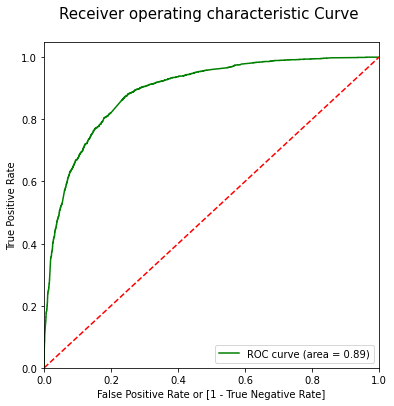

In [121]:

draw_roc(y_train_pred_df.Original_Conver, y_train_pred_df.Conver_Prob)


## Points to be concluded from above roc curve

1. The curve is closer to the top left corner  of the border and this is a measure of good accuracy.

2. Here the area under the curve is 89 % of the total area.


In [122]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    
    y_train_pred_df[i]= y_train_pred_df.Conver_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_df.head()


Original_Conver  Conver_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  \
5334                1     0.709425  5334          1    1    1    1    1    1   
9060                0     0.460538  9060          0    1    1    1    1    1   
310                 0     0.055804   310          0    1    0    0    0    0   
4585                1     0.425529  4585          0    1    1    1    1    1   
1052                1     0.705517  1052          1    1    1    1    1    1   

      0.5  0.6  0.7  0.8  0.9  
5334    1    1    1    0    0  
9060    0    0    0    0    0  
310     0    0    0    0    0  
4585    0    0    0    0    0  
1052    1    1    1    0    0

In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_leads_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm1 = confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_leads_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.382367  1.000000  0.000000
0.1   0.1  0.607261  0.981915  0.375318
0.2   0.2  0.768034  0.913276  0.678117
0.3   0.3  0.801194  0.874229  0.755980
0.4   0.4  0.814081  0.777641  0.836641
0.5   0.5  0.814867  0.703247  0.883969
0.6   0.6  0.811253  0.632963  0.921628
0.7   0.7  0.786107  0.520756  0.950382
0.8   0.8  0.765519  0.438553  0.967939
0.9   0.9  0.705956  0.252363  0.986768


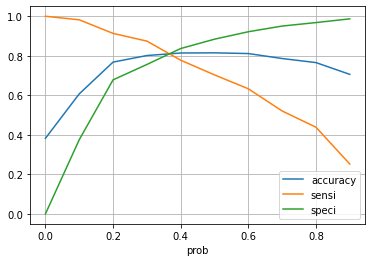

In [124]:
# Let's draw Accuracy Vs Sensitivity Vs Specificity to see the optimal cut off

cutoff_leads_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.grid()

plt.show()



#### From the curve above, it's around 0.32 we have an optimal value


In [125]:
# Apply the new threshold value of .32

y_train_pred_df['final_predicted'] = y_train_pred_df.Conver_Prob.map( lambda x: 1 if x > .34 else 0)

y_train_pred_df.head()


Original_Conver  Conver_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  \
5334                1     0.709425  5334          1    1    1    1    1    1   
9060                0     0.460538  9060          0    1    1    1    1    1   
310                 0     0.055804   310          0    1    0    0    0    0   
4585                1     0.425529  4585          0    1    1    1    1    1   
1052                1     0.705517  1052          1    1    1    1    1    1   

      0.5  0.6  0.7  0.8  0.9  final_predicted  
5334    1    1    1    0    0                1  
9060    0    0    0    0    0                1  
310     0    0    0    0    0                0  
4585    0    0    0    0    0                1  
1052    1    1    1    0    0                1

In [126]:

# Let's check the accuracy with the revised threshold

train_accuracy=round(metrics.accuracy_score(y_train_pred_df.Original_Conver, y_train_pred_df.final_predicted)*100,2)

print("Accuracy :", train_accuracy,'%')


Accuracy : 80.98 %


In [127]:
# New confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_df.Original_Conver, y_train_pred_df.final_predicted )
confusion2


array([[3166,  764],
       [ 446, 1987]], dtype=int64)

In [128]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [129]:

# Let's check the evaluation scores of the training data

train_sensitivity = round(TP / float(TP+FN)*100,2)

train_specificity= round(TN / float(TN+FP)*100,2)

train_precision=round(precision_score(y_train_pred_df.Original_Conver, y_train_pred_df.final_predicted)*100,2)

train_recall= round(recall_score(y_train_pred_df.Original_Conver, y_train_pred_df.final_predicted)*100,2)

train_f1_Score=round(f1_score(y_train_pred_df.Original_Conver, y_train_pred_df.final_predicted)*100,2)


In [130]:

print('SCORES FOR THE TRAINING DATA SET \n')  

print( 'Accuracy  : ', train_accuracy,'%\n')

print( 'Sensitivity : ', train_sensitivity,'%\n')

print( 'Specificity : ', train_specificity,'%\n')

print( 'Precision : ', train_precision,'%\n')

print( 'Recall : ', train_recall,'%\n')

print('F1 score : ',train_f1_Score,'%\n')


SCORES FOR THE TRAINING DATA SET 

Accuracy  :  80.98 %

Sensitivity :  81.67 %

Specificity :  80.56 %

Precision :  72.23 %

Recall :  81.67 %

F1 score :  76.66 %




## Let's draw the Precision Vs Recall 


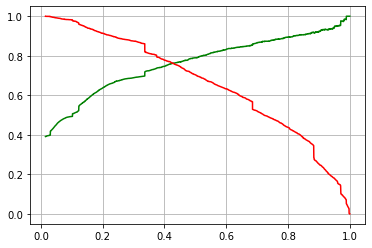

In [131]:

p, r, thresholds = precision_recall_curve(y_train_pred_df.Original_Conver, y_train_pred_df.Conver_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.grid()

plt.show()


### Looks like Precision-Recall cut ooff value is slighly higher than the Sensitivity-Specificity cut-off



### Step 11: Making predictions on the test set

In [132]:
# Scaling numeric variables for the validation dataset

X_test[num_cols]=scaler.transform(X_test[num_cols])


In [133]:

X_test.head()


TotalVisits  Total Time Spent on Website  \
8262     0.054054                     0.679577   
4768     0.000000                     0.000000   
7409     0.067568                     0.567782   
8893     0.054054                     0.034771   
5541     0.027027                     0.531250   

      A free copy of Mastering The Interview  \
8262                                       1   
4768                                       0   
7409                                       0   
8893                                       1   
5541                                       1   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
8262                                    1                          0   
4768                                    0                          0   
7409                                    1                          0   
8893                                    1                          0   
5541                                    1                          0   

      Lead Origin_lead import  Lead Source_blog  Lead Source_click2call  \
8262                        0                 0                       0   
4768                        0                 0                       0   
7409                        0                 0                       0   
8893                        0                 0                       0   
5541                        0                 0                       0   

      Lead Source_direct traffic  Lead Source_google  Lead Source_live chat  \
8262                           0                   0                      0   
4768                           0                   0                      0   
7409                           1                   0                      0   
8893                           1                   0                      0   
5541                           1                   0                      0   

      Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
8262                   0                       0                           1   
4768                   0                       1                           0   
7409                   0                       0                           0   
8893                   0                       0                           0   
5541                   0                       0                           0   

      Lead Source_pay per click ads  Lead Source_press_release  \
8262                              0                          0   
4768                              0                          0   
7409                              0                          0   
8893                              0                          0   
5541                              0                          0   

      Lead Source_referral sites  Lead Source_social media  \
8262                           0                         0   
4768                           0                         0   
7409                           0                         0   
8893                           0                         0   
5541                           0                         0   

      Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  \
8262                    0                    0                             0   
4768                    0                    0                             0   
7409                    0                    0                             0   
8893                    0                    0                             0   
5541                    0                    0                             0   

      Lead Source_welingak website  Lead Source_youtubechannel  \
8262                             0                           0   
4768                             0                           0   
7409                             0                           0   
8893                             0                           

In [134]:

X_test.shape


(2728, 55)

In [135]:

X_test[rfe_cols]


TotalVisits  Total Time Spent on Website  Lead Origin_lead add form  \
8262     0.054054                     0.679577                          0   
4768     0.000000                     0.000000                          0   
7409     0.067568                     0.567782                          0   
8893     0.054054                     0.034771                          0   
5541     0.027027                     0.531250                          0   
...           ...                          ...                        ...   
7956     0.000000                     0.000000                          0   
3221     0.027027                     0.394366                          0   
1964     0.040541                     0.036092                          0   
1568     0.000000                     0.000000                          1   
6126     0.000000                     0.000000                          1   

      Lead Source_olark chat  Do Not Email_yes  \
8262                       0                 0   
4768                       1                 0   
7409                       0                 0   
8893                       0                 0   
5541                       0                 0   
...                      ...               ...   
7956                       1                 0   
3221                       0                 0   
1964                       0                 0   
1568                       0                 0   
6126                       0                 0   

      Last Activity_converted to lead  Last Activity_had a phone conversation  \
8262                                0                                       0   
4768                                0                                       0   
7409                                0                                       0   
8893                                0                                       0   
5541                                0                                       0   
...                               ...                                     ...   
7956                                0                                       0   
3221                                0                                       0   
1964                                0                                       0   
1568                                0                                       0   
6126                                0                                       0   

      Last Activity_olark chat conversation  \
8262                                      0   
4768                                      1   
7409                                      0   
8893                                      1   
5541                                      0   
...                                     ...   
7956                                      0   
3221                                      0   
1964                                      0   
1568                                      0   
6126                                      0   

      What is your current occupation_not provided  \
8262                                             0   
4768                                             1   
7409                                             0   
8893                                             0   
5541                                             0   
...                                            ...   
7956                                             1   
3221                                             1   
1964                                             0   
1568                                             0   
6126                                             0   

      What is your current occupation_working professional  \
8262                                                  0      
4768                                                  0      
7409                                                  0      
8893                                         

In [136]:

# Prediction on the test dataset

y_test_pred= res.predict(sm.add_constant(X_test[rfe_cols]))



## Lead Scoring


In [137]:
# We will add a new column as Lead_Score which assigns a scoring for each lead, higher the score means higher chance of conversion


y_test_pred_df = pd.DataFrame({'Original_Conver':y_test.Converted, 'Conver_Prob':y_test_pred,'Lead_Score':y_test_pred*100,'ID': y_test.index})

y_test_pred_df.head()


Original_Conver  Conver_Prob  Lead_Score    ID
8262                1     0.748723   74.872276  8262
4768                0     0.030349    3.034939  4768
7409                1     0.646687   64.668704  7409
8893                0     0.032915    3.291528  8893
5541                1     0.985458   98.545765  5541

In [138]:
# Creating a dataframe with the actual Conversion and the predicted probabilities for the test data

y_test_pred_df['predicted'] = y_test_pred_df.Conver_Prob.map(lambda x: 1 if x > 0.34 else 0)

y_test_pred_df.head()


Original_Conver  Conver_Prob  Lead_Score    ID  predicted
8262                1     0.748723   74.872276  8262          1
4768                0     0.030349    3.034939  4768          0
7409                1     0.646687   64.668704  7409          1
8893                0     0.032915    3.291528  8893          0
5541                1     0.985458   98.545765  5541          1

In [139]:
# Confusion matrix for the test data

test_confusion = confusion_matrix(y_test_pred_df.Original_Conver, y_test_pred_df.predicted)

test_confusion


array([[1368,  335],
       [ 197,  828]], dtype=int64)

In [140]:

TP = test_confusion[1,1] # true positive 
TN = test_confusion[0,0] # true negatives
FP = test_confusion[0,1] # false positives
FN = test_confusion[1,0] # false negatives


In [141]:

# Let's check the evaluation scores of the validation data

test_accuracy = round(accuracy_score(y_test_pred_df.Original_Conver, y_test_pred_df.predicted)*100,2)

test_sensitivity = round(TP / float(TP+FN)*100,2)

test_specificity= round(TN / float(TN+FP)*100,2)

test_precision=round(precision_score(y_test_pred_df.Original_Conver, y_test_pred_df.predicted)*100,2)

test_recall= round(recall_score(y_test_pred_df.Original_Conver, y_test_pred_df.predicted)*100,2)

test_f1_Score=round(f1_score(y_test_pred_df.Original_Conver, y_test_pred_df.predicted)*100,2)

#F1 Score = 2*((precision*recall)/(precision+recall))

In [142]:

print('SCORES FOR THE VALIDATION DATATSET \n')      

print( 'Accuracy  : ', test_accuracy,'%\n')

print( 'Sensitivity : ', test_sensitivity,'%\n')

print( 'Specificity : ', test_specificity,'%\n')

print( 'Precision : ', test_precision,'%\n')

print( 'Recall : ', test_recall,'%\n')

print('F1 score : ',test_f1_Score,'%\n')


SCORES FOR THE VALIDATION DATATSET 

Accuracy  :  80.5 %

Sensitivity :  80.78 %

Specificity :  80.33 %

Precision :  71.2 %

Recall :  80.78 %

F1 score :  75.69 %




## Conclusion:

Most significant features those can contribute towards better conversion rate are :

1. Total Time Spent on Website
2. Lead Origin_lead add form
3. What is your current occupation_working professional
4. Last Activity_had a phone conversation
5. TotalVisits

X Education can make use of this model to target the potential candidates to screen those who have a higher probability of enrolling to their programs.